In [3]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy as sp
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
from scipy.stats import skew, shapiro

In [9]:
# ! pip install 'smbprotocol[kerberos]'

     |████████████████████████████████| 125 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 963 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 712 kB 6.2 MB/s eta 0:00:01


In [ ]:
# base_path = '/Volumes/lab-kohlj/home/shared/projects/'
# path = base_path + '/Sensitization/Ephys/EPhys Analysis/MPOAGal 4 days sensitization_V6.xlsx'    

In [6]:
base_path = '/Volumes/lab-kohlj/home/shared/projects/'
path = base_path + '/Sensitization/Ephys/EPhys Analysis/MPOAGal 4 days sensitization_V6.xlsx'

In [7]:
# import the sheet CsMes04- from the excel file
df = pd.read_excel(path, sheet_name='CsMesO4-')

In [89]:
# clean the data
df = df.iloc[1:] # remove the first row
df = df.dropna(axis=1, how='all') # remove columns with all NaN values
df

,Day_experiment,ID_Mice,State,Estrous_stage,Frequency_Glu,Amplitude_Glu,Rise_Glu,Decay_Glu,Frequency_GABA,Amplitude_GABA,Rise_GABA,Decay_GABA,Unnamed: 12
1,S1C1 01122020,JKAM16.1d,Virgin_Naive,D>P,2.336182,6.9,5.6,12.8,1.274614,7.1,4.5,174.1,NaN
2,S1C2 01122020,JKAM16.1d,Virgin_Naive,D>P,2.946554,12.9,1.8,18.3,3.944266,9.2,4.6,9,NaN
3,S1C3 01122020,JKAM16.1d,Virgin_Naive,D>P,2.845471,9.2,2.5,16.2,5.011041,11.9,3.9,10,NaN
4,S1C4 01122020,JKAM16.1d,Virgin_Naive,D>P,0.11713,8.6,2.3,2.8,2.034939,11.33,3.5,134.3,NaN
5,S1C5 01122020,JKAM16.1d,Virgin_Naive,D>P,0.278541,13.4,1.9,17.8,2.614455,9.35,2.7,10.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,s1c1 12042024,JKAM67.2h,Virgin_Sensitized,M,1.512134,9.1,1,11.6,0.969106,13.4,1,27.2,NaN
66,s1c2 12042024,JKAM67.2h,Virgin_Sensitized,M,1.783751,5.8,0.9,12.6,4.808571,18.4,2.4,44.8,NaN
67,s1c3 12042024,JKAM67.2h,Virgin_Sensitized,M,8.531699,11,0.9,11.9,3.178914,11.7,4.8,58.1,NaN
68,s1c4 12042024,JKAM67.2h,Virgin_Sensitized,M,5.600225,11.4,1.2,18.8,7.00233,22.8,1.6,31.4,NaN


In [8]:
# convert Frequency_Glu and Frequency_GABA to numeric
df['Frequency_Glu'] = pd.to_numeric(df['Frequency_Glu'], errors='coerce')
df['Frequency_GABA'] = pd.to_numeric(df['Frequency_GABA'], errors='coerce')

In [9]:
print('Number of cells in virgin state is:', len(df[df['State'] == 'Virgin_Naive']))
print('Number of cells in sensitised state is:', len(df[df['State'] == 'Virgin_Sensitized']))

Number of cells in virgin state is: 40
Number of cells in sensitised state is: 29


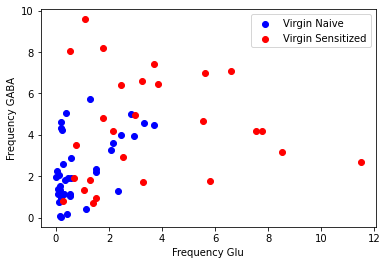

In [10]:
# plot scatterplot with regression line of sEPSC frequency vs sIPSC frequency
fig, ax = plt.subplots()
ax.scatter(df[df['State'] == 'Virgin_Naive']['Frequency_Glu'], df[df['State'] == 'Virgin_Naive']['Frequency_GABA'], color='blue', label='Virgin Naive')
ax.scatter(df[df['State'] == 'Virgin_Sensitized']['Frequency_Glu'], df[df['State'] == 'Virgin_Sensitized']['Frequency_GABA'], color='red', label='Virgin Sensitized')
ax.set_xlabel('Frequency Glu')
ax.set_ylabel('Frequency GABA')
ax.legend()

In [11]:
# test for skweness and normality of the data
# Separate the data into 'sensitized' and 'virgin' groups
sensitized = df[df['State'] == 'Virgin_Sensitized']
virgin = df[df['State'] == 'Virgin_Naive']

# Define a function to calculate skewness and perform the Shapiro-Wilk test
def test_distribution(data, variable_name):
    # Calculate skewness
    skewness = skew(data[variable_name].dropna())
    print(f"Skewness of {variable_name}: {skewness}")

    # Perform Shapiro-Wilk test
    shapiro_stat, shapiro_p_value = shapiro(data[variable_name].dropna())
    print(f"Shapiro-Wilk test for {variable_name} - Statistic: {shapiro_stat}, p-value: {shapiro_p_value}")

# Test for 'glutamate' and 'GABA' frequency distributions in the 'sensitized' state
print("Sensitized State:")
test_distribution(sensitized, 'Frequency_Glu')
test_distribution(sensitized, 'Frequency_GABA')

# Test for 'glutamate' and 'GABA' frequency distributions in the 'virgin' state
print("\nVirgin State:")
test_distribution(virgin, 'Frequency_Glu')
test_distribution(virgin, 'Frequency_GABA')


Sensitized State:
Skewness of Frequency_Glu: 1.0717031009637554
Shapiro-Wilk test for Frequency_Glu - Statistic: 0.8813513517379761, p-value: 0.004301202483475208
Skewness of Frequency_GABA: 0.3371587844100908
Shapiro-Wilk test for Frequency_GABA - Statistic: 0.940420925617218, p-value: 0.1132928654551506

Virgin State:
Skewness of Frequency_Glu: 1.1954689446709683
Shapiro-Wilk test for Frequency_Glu - Statistic: 0.7911274433135986, p-value: 8.683927262609359e-06
Skewness of Frequency_GABA: 0.4411913670323815
Shapiro-Wilk test for Frequency_GABA - Statistic: 0.9340994358062744, p-value: 0.02705727145075798


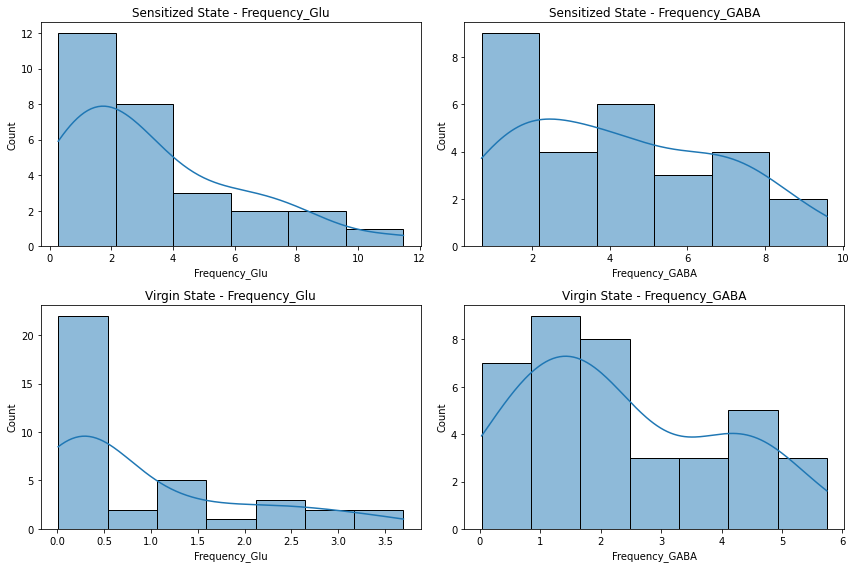

In [12]:
# Plot the distributions of 'Frequency_Glu' and 'Frequency_GABA' for the 'sensitized' and 'virgin' states as histograms
plt.figure(figsize=(12, 8))

# Plot for Sensitized - Frequency_Glu
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.histplot(sensitized['Frequency_Glu'].dropna(), kde=True)
plt.title('Sensitized State - Frequency_Glu')

# Plot for Sensitized - Frequency_GABA
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.histplot(sensitized['Frequency_GABA'].dropna(), kde=True)
plt.title('Sensitized State - Frequency_GABA')

# Plot for Virgin - Frequency_Glu
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.histplot(virgin['Frequency_Glu'].dropna(), kde=True)
plt.title('Virgin State - Frequency_Glu')

# Plot for Virgin - Frequency_GABA
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.histplot(virgin['Frequency_GABA'].dropna(), kde=True)
plt.title('Virgin State - Frequency_GABA')

plt.tight_layout()
plt.show()


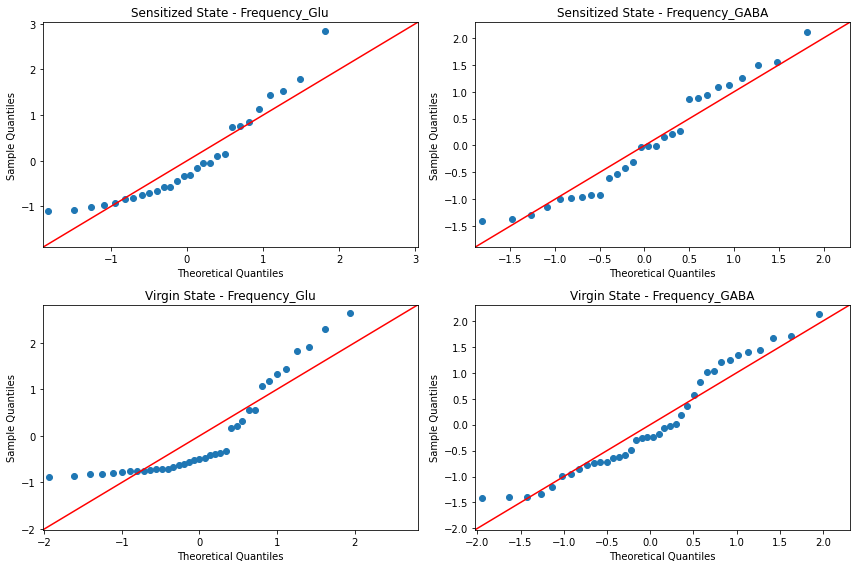

In [13]:
# Plot the glutamate and GABA frequency distributions for the 'sensitized' and 'virgin' states in qq plots to show deviation from normality
plt.figure(figsize=(12, 8))

# Q-Q plot for Sensitized - Frequency_Glu
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sm.qqplot(sensitized['Frequency_Glu'].dropna(), line='45', fit=True, ax=plt.gca())
plt.title('Sensitized State - Frequency_Glu')

# Q-Q plot for Sensitized - Frequency_GABA
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sm.qqplot(sensitized['Frequency_GABA'].dropna(), line='45', fit=True, ax=plt.gca())
plt.title('Sensitized State - Frequency_GABA')

# Q-Q plot for Virgin - Frequency_Glu
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sm.qqplot(virgin['Frequency_Glu'].dropna(), line='45', fit=True, ax=plt.gca())
plt.title('Virgin State - Frequency_Glu')

# Q-Q plot for Virgin - Frequency_GABA
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sm.qqplot(virgin['Frequency_GABA'].dropna(), line='45', fit=True, ax=plt.gca())
plt.title('Virgin State - Frequency_GABA')

plt.tight_layout()
plt.show()


In [30]:
# # remove outliers by removing data falling outside interquartile range
# df_filtered = df.copy()

# Q1_x = df_filtered['Frequency_Glu'].quantile(0.25)
# Q3_x = df_filtered['Frequency_Glu'].quantile(0.75)
# IQR_x = Q3_x - Q1_x

# df_filtered = df_filtered[~((df_filtered['Frequency_Glu'] < (Q1_x - 1.5 * IQR_x)) | (df_filtered['Frequency_Glu'] > (Q3_x + 1.5 * IQR_x)))]

# Q1_y = df_filtered['Frequency_GABA'].quantile(0.25)
# Q3_y = df_filtered['Frequency_GABA'].quantile(0.75)
# IQR_y = Q3_y - Q1_y

# df_filtered = df_filtered[~((df_filtered['Frequency_GABA'] < (Q1_y - 1.5 * IQR_y)) | (df_filtered['Frequency_GABA'] > (Q3_y + 1.5 * IQR_y)))]


In [14]:
# remove outliers by removing data falling outside interquartile range in virgins and sensitized separately, for both glutamate and GABA
sensitized_filtered = sensitized.copy()
virgin_filtered = virgin.copy()

# Remove outliers in the 'sensitized' state
# sensitized = df_filtered[df_filtered['State'] == 'Virgin_Sensitized']
Q1_x = sensitized_filtered['Frequency_Glu'].quantile(0.25)
Q3_x = sensitized_filtered['Frequency_Glu'].quantile(0.75)
IQR_x = Q3_x - Q1_x
sensitized_filtered = sensitized_filtered[~((sensitized_filtered['Frequency_Glu'] < (Q1_x - 1.5 * IQR_x)) | (sensitized_filtered['Frequency_Glu'] > (Q3_x + 1.5 * IQR_x)))]

Q1_y = sensitized_filtered['Frequency_GABA'].quantile(0.25)
Q3_y = sensitized_filtered['Frequency_GABA'].quantile(0.75)
IQR_y = Q3_y - Q1_y
sensitized_filtered = sensitized_filtered[~((sensitized_filtered['Frequency_GABA'] < (Q1_y - 1.5 * IQR_y)) | (sensitized_filtered['Frequency_GABA'] > (Q3_y + 1.5 * IQR_y)))]

# Remove outliers in the 'virgin' state
# virgin = df_filtered[df_filtered['State'] == 'Virgin_Naive']
Q1_x = virgin_filtered['Frequency_Glu'].quantile(0.25)
Q3_x = virgin_filtered['Frequency_Glu'].quantile(0.75)
IQR_x = Q3_x - Q1_x
virgin_filtered = virgin_filtered[~((virgin_filtered['Frequency_Glu'] < (Q1_x - 1.5 * IQR_x)) | (virgin_filtered['Frequency_Glu'] > (Q3_x + 1.5 * IQR_x)))]

Q1_y = virgin_filtered['Frequency_GABA'].quantile(0.25)
Q3_y = virgin_filtered['Frequency_GABA'].quantile(0.75)
IQR_y = Q3_y - Q1_y
virgin_filtered = virgin_filtered[~((virgin_filtered['Frequency_GABA'] < (Q1_y - 1.5 * IQR_y)) | (virgin_filtered['Frequency_GABA'] > (Q3_y + 1.5 * IQR_y)))]


In [15]:
print('Number of cells in virgin state is:', len(virgin_filtered[virgin_filtered['State'] == 'Virgin_Naive']))
print('Number of cells in sensitised state is:', len(sensitized_filtered[sensitized_filtered['State'] == 'Virgin_Sensitized']))

Number of cells in virgin state is: 39
Number of cells in sensitised state is: 29


In [16]:
# fit a regression model to the virgin naive and calculate and display r_squared
model_virgin = smf.ols('Frequency_GABA ~ Frequency_Glu', data=virgin_filtered).fit()
r_squared_naive = model_virgin.rsquared
print('r_squared:', r_squared_naive)

print('model summary:', model_virgin.summary())

p_values = model_virgin.pvalues
print('p_values:', p_values)

r_squared: 0.22410292533545295
model summary:                             OLS Regression Results                            
Dep. Variable:         Frequency_GABA   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     9.531
Date:                Thu, 05 Jun 2025   Prob (F-statistic):            0.00408
Time:                        19:50:22   Log-Likelihood:                -60.972
No. Observations:                  35   AIC:                             125.9
Df Residuals:                      33   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------


In [17]:
# fit a regression model to the virgin sensitized and calculate and display r_squared
model_sensitized = smf.ols('Frequency_GABA ~ Frequency_Glu', data=sensitized_filtered).fit()
r_squared_sensitized = model_sensitized.rsquared
print('r_squared:', r_squared_sensitized)

print('model summary:', model_sensitized.summary())

p_values = model_sensitized.pvalues
print('p_values:', p_values)

r_squared: 0.0009099738973075144
model summary:                             OLS Regression Results                            
Dep. Variable:         Frequency_GABA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.02277
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.881
Time:                        19:50:27   Log-Likelihood:                -63.367
No. Observations:                  27   AIC:                             130.7
Df Residuals:                      25   BIC:                             133.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

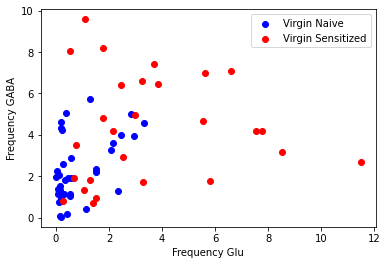

In [18]:
# plot scatterplot with regression line of sEPSC frequency vs sIPSC frequency for virgin and sensitized
fig, ax = plt.subplots()
ax.scatter(virgin_filtered['Frequency_Glu'], virgin_filtered['Frequency_GABA'], color='blue', label='Virgin Naive')
ax.scatter(sensitized_filtered['Frequency_Glu'], sensitized_filtered['Frequency_GABA'], color='red', label='Virgin Sensitized')
ax.set_xlabel('Frequency Glu')
ax.set_ylabel('Frequency GABA')
ax.legend()

# plot regression line for virgin naive and sensitized
x = np.linspace(0, 20, 100)



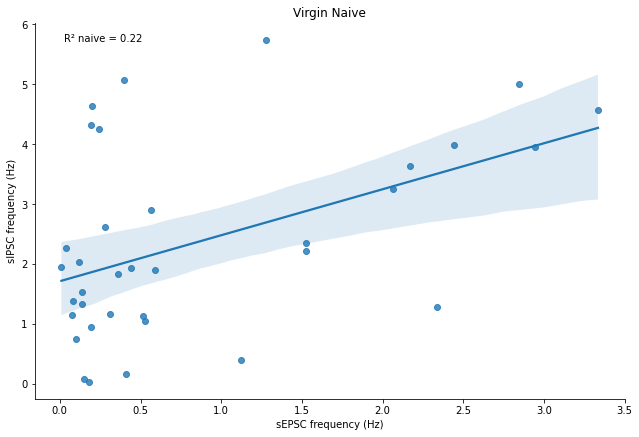

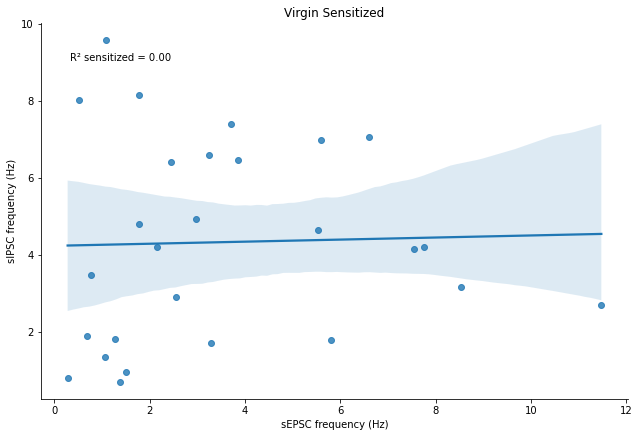

In [19]:
# plot scatterplot with regression line of sEPSC frequency vs sIPSC frequency
g = sns.lmplot(x='Frequency_Glu', y='Frequency_GABA', data=virgin_filtered, palette='viridis', height=6, aspect=1.5)
plt.xlabel('sEPSC frequency (Hz)')
plt.ylabel('sIPSC frequency (Hz)')
plt.title('Virgin Naive')
plt.gca().annotate(f'R² naive = {r_squared_naive:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, backgroundcolor='white')

g = sns.lmplot(x='Frequency_Glu', y='Frequency_GABA', data=sensitized_filtered, palette='viridis', height=6, aspect=1.5)
plt.xlabel('sEPSC frequency (Hz)')
plt.ylabel('sIPSC frequency (Hz)')
plt.title('Virgin Sensitized')

# annotate the plot with the r_squared value for both naive and sensitized

plt.gca().annotate(f'R² sensitized = {r_squared_sensitized:.2f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, backgroundcolor='white')

plt.show()

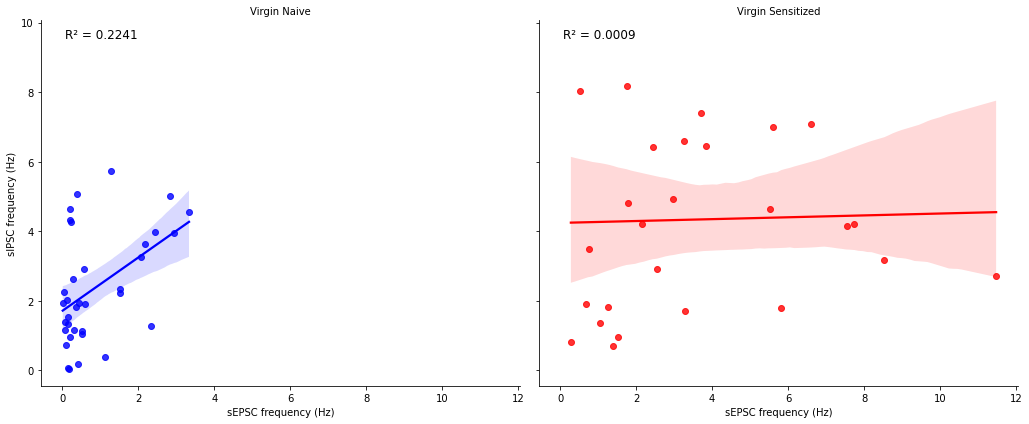

In [22]:
# Create a combined dataframe with an additional column to differentiate the groups
combined_df = pd.concat([
    virgin_filtered.assign(group='Virgin Naive'),
    sensitized_filtered.assign(group='Virgin Sensitized')
])

# Create a facet grid plot with subplots for each group
g = sns.lmplot(
    x='Frequency_Glu', 
    y='Frequency_GABA', 
    data=combined_df, 
    col='group',
    hue='group',
    palette={'Virgin Naive': 'blue', 'Virgin Sensitized': 'red'},
    height=6, 
    aspect=1.2,
    col_order=['Virgin Naive', 'Virgin Sensitized']
)

# Add annotations for R² values to each subplot
g.axes[0,0].annotate(f'R² = {r_squared_naive:.4f}', 
                     xy=(0.05, 0.95), 
                     xycoords='axes fraction', 
                     fontsize=12, 
                     backgroundcolor='white')

g.axes[0,1].annotate(f'R² = {r_squared_sensitized:.4f}', 
                     xy=(0.05, 0.95), 
                     xycoords='axes fraction', 
                     fontsize=12, 
                     backgroundcolor='white')

# Set consistent labels
g.set_axis_labels('sEPSC frequency (Hz)', 'sIPSC frequency (Hz)')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

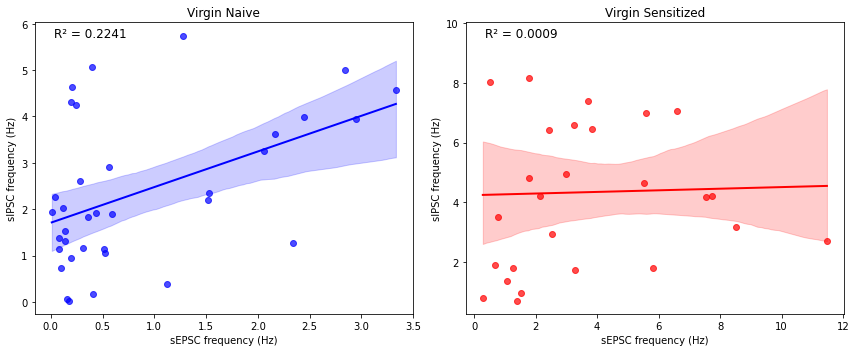

In [24]:
# Create a combined dataframe with an additional column to differentiate the groups
combined_df = pd.concat([
    virgin_filtered.assign(group='Virgin Naive'),
    sensitized_filtered.assign(group='Virgin Sensitized')
])

# Import sklearn for regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define the groups and colors
groups = ['Virgin Naive', 'Virgin Sensitized']
colors = ['blue', 'red']

# Create plots for each group
for i, (group, color) in enumerate(zip(groups, colors)):
    # Get data for this group and ensure no NaN values
    group_data = combined_df[combined_df['group'] == group].dropna(subset=['Frequency_Glu', 'Frequency_GABA'])
    
    # Convert to numpy arrays carefully checking for valid values
    x = group_data['Frequency_Glu'].values.reshape(-1, 1)
    y = group_data['Frequency_GABA'].values
    
    # Further validate to remove any infinite values
    valid_indices = np.isfinite(x).all(axis=1) & np.isfinite(y)
    x = x[valid_indices]
    y = y[valid_indices]
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Calculate R-squared
    y_pred = model.predict(x)
    r_squared = r_squared_naive if group == 'Virgin Naive' else r_squared_sensitized
    
    # Plot data points
    axes[i].scatter(x, y, color=color, alpha=0.7)
    
    # Plot regression line
    x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    y_pred_line = model.predict(x_range)
    axes[i].plot(x_range, y_pred_line, color=color, linewidth=2)
    
    # Add R² annotation
    axes[i].annotate(f'R² = {r_squared:.4f}', 
                     xy=(0.05, 0.95), 
                     xycoords='axes fraction', 
                     fontsize=12, 
                     backgroundcolor='white')
    
    # Set title and labels
    axes[i].set_title(group)
    axes[i].set_xlabel('sEPSC frequency (Hz)')
    axes[i].set_ylabel('sIPSC frequency (Hz)')
    
    # Add confidence interval (95%)
    from sklearn.utils import resample
    
    # Initialize arrays for storing bootstrap results
    n_bootstraps = 1000
    bootstrap_predictions = np.zeros((n_bootstraps, len(x_range)))
    
    # Perform bootstrap sampling and prediction
    for j in range(n_bootstraps):
        # Sample with replacement
        indices = resample(range(len(x)), replace=True, n_samples=len(x))
        x_boot, y_boot = x[indices], y[indices]
        
        # Fit model to bootstrap sample
        model_boot = LinearRegression()
        model_boot.fit(x_boot, y_boot)
        
        # Predict using the bootstrap model
        bootstrap_predictions[j] = model_boot.predict(x_range).ravel()
    
    # Calculate confidence intervals
    lower_bound = np.percentile(bootstrap_predictions, 2.5, axis=0)
    upper_bound = np.percentile(bootstrap_predictions, 97.5, axis=0)
    
    # Plot confidence intervals
    axes[i].fill_between(x_range.ravel(), lower_bound, upper_bound, 
                         color=color, alpha=0.2)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Fit regression model to the virgin naive FULL dataset (without IQR filtering)
model_virgin_full = smf.ols('Frequency_GABA ~ Frequency_Glu', data=virgin).fit()
r_squared_naive_full = model_virgin_full.rsquared
print('Virgin Naive - Full Dataset:')
print('r_squared:', r_squared_naive_full)
print('model summary:', model_virgin_full.summary())
print('p_values:', model_virgin_full.pvalues)
print('\n' + '-'*50 + '\n')

# Fit regression model to the virgin sensitized FULL dataset (without IQR filtering)
model_sensitized_full = smf.ols('Frequency_GABA ~ Frequency_Glu', data=sensitized).fit()
r_squared_sensitized_full = model_sensitized_full.rsquared
print('Virgin Sensitized - Full Dataset:')
print('r_squared:', r_squared_sensitized_full)
print('model summary:', model_sensitized_full.summary())
print('p_values:', model_sensitized_full.pvalues)

Virgin Naive - Full Dataset:
r_squared: 0.26156080857195774
model summary:                             OLS Regression Results                            
Dep. Variable:         Frequency_GABA   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     12.04
Date:                Thu, 05 Jun 2025   Prob (F-statistic):            0.00143
Time:                        20:33:56   Log-Likelihood:                -62.208
No. Observations:                  36   AIC:                             128.4
Df Residuals:                      34   BIC:                             131.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

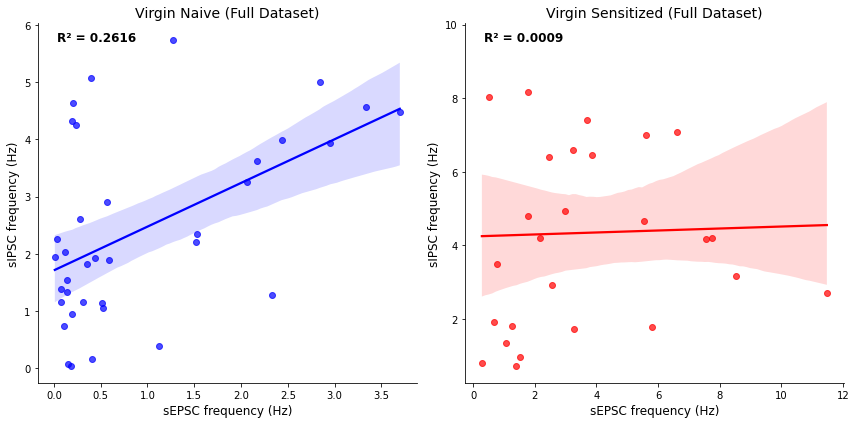

In [27]:
# Create a combined dataframe with the unfiltered data
combined_df_full = pd.concat([
    virgin.assign(group='Virgin Naive'),
    sensitized.assign(group='Virgin Sensitized')
])

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the groups and colors
groups = ['Virgin Naive', 'Virgin Sensitized']
colors = ['blue', 'red']
r_squared_values = [r_squared_naive_full, r_squared_sensitized_full]

# Create plots for each group
for i, (group, color, r2) in enumerate(zip(groups, colors, r_squared_values)):
    # Get data for this group
    group_data = combined_df_full[combined_df_full['group'] == group].dropna(subset=['Frequency_Glu', 'Frequency_GABA'])
    
    # Plot scatter points
    axes[i].scatter(group_data['Frequency_Glu'], group_data['Frequency_GABA'], 
                   color=color, alpha=0.7)
    
    # Fit and plot regression line
    sns.regplot(x='Frequency_Glu', y='Frequency_GABA', data=group_data,
               ax=axes[i], scatter=False, color=color, ci=95)
    
    # Add R² annotation in top left corner
    axes[i].annotate(f'R² = {r2:.4f}', xy=(0.05, 0.95),
                    xycoords='axes fraction', fontsize=12,
                    fontweight='bold', backgroundcolor='white')
    
    # Set title and labels
    axes[i].set_title(f"{group} (Full Dataset)", fontsize=14)
    axes[i].set_xlabel('sEPSC frequency (Hz)', fontsize=12)
    axes[i].set_ylabel('sIPSC frequency (Hz)', fontsize=12)
    
    # Clean up appearance
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [28]:
print('Original sensitized rows:', len(sensitized))
print('Filtered sensitized rows:', len(sensitized_filtered))

Original sensitized rows: 29
Filtered sensitized rows: 29


In [29]:
print('Original naive rows:', len(virgin))
print('Filtered naive rows:', len(virgin_filtered))

Original naive rows: 40
Filtered naive rows: 39
